# Making MA Plot
--------------

# Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data and then clean
- We will use female 14D and 10 to show how female gene expression changes over time. The ratio change will demonstrate ratio of 14D (old) to 10 (young)
- We add 1 to the data so that we can take the log of all values that were originally 0

In [2]:
df_all = pd.read_csv( "../../qbb2021/data/fpkms.csv", index_col="gene_name")
df_all

,t_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
gene_name,,,,,,,,,,,,,,,,,
CR41571,FBtr0114258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CG45784,FBtr0346770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR12798,FBtr0302440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40182,FBtr0302347,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
CG45783,FBtr0346769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CR40502,FBtr0114187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40719,FBtr0304147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
CR40679,FBtr0114216,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


In [3]:
df = df_all.loc[:, ['female_10', 'female_14D']]
df = df + 1
df

,female_10,female_14D
gene_name,,
CR41571,1.000000,1.00000
CG45784,1.000000,1.00000
CR12798,1.000000,1.00000
CR40182,22.894249,18.20257
CG45783,1.000000,1.00000
...,...,...
CR40502,1.000000,1.00000
CR40719,1.000000,1.00000
CR40679,14.475658,2.98591


# Calculate values
- Equations for M and A come from [the Wikipedia page on MA plots](https://en.wikipedia.org/wiki/MA_plot)

In [4]:
m = np.log2(df.loc[:, 'female_14D']/df.loc[:, 'female_10'])
m

gene_name
CR41571    0.000000
CG45784    0.000000
CR12798    0.000000
CR40182   -0.330843
CG45783    0.000000
             ...   
CR40502    0.000000
CR40719    0.000000
CR40679   -2.277386
CR40743    0.000000
CR41619    0.000000
Length: 34718, dtype: float64

In [5]:
a = 0.5 * np.log2(df.loc[:, 'female_14D'] * df.loc[:, 'female_10'])
a

gene_name
CR41571    0.000000
CG45784    0.000000
CR12798    0.000000
CR40182    4.351492
CG45783    0.000000
             ...   
CR40502    0.000000
CR40719    0.000000
CR40679    2.716864
CR40743    0.000000
CR41619    0.000000
Length: 34718, dtype: float64

# Plot data
- A goes on x-axis and M goes on y-axis

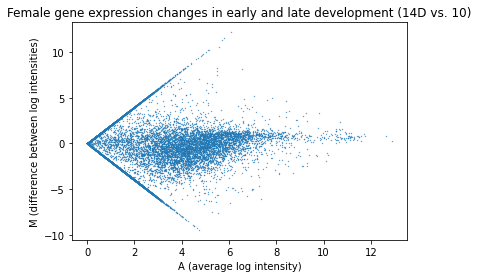

In [6]:
fig, ax = plt.subplots()
ax.scatter( a, m, s=0.1 )
ax.set_title("Female gene expression changes in early and late development "
            "(14D vs. 10)")
ax.set_xlabel("A (average log intensity)")
ax.set_ylabel("M (difference between log intensities)")
plt.show()

# Advanced Exercise Part 01
-------------------------------

# Get data

In [7]:
genes_oi = ['sisA', 'sc', 'run', 'Sxl', 'msl-2']
df_highlight = df.loc[genes_oi]
df_highlight.head()

,female_10,female_14D
gene_name,,
sisA,6.245830,140.547607
sc,2.254818,4.105765
run,1.000000,1.000000
run,1.000000,9.203027
run,1.000000,72.760147


# Do calculations

In [8]:
m_hl = np.log2(df_highlight.loc[:, 'female_14D']/df.loc[:, 'female_10'])
a_hl = 0.5 * np.log2(df_highlight.loc[:, 'female_14D'] * df.loc[:, 'female_10'])

# Plot

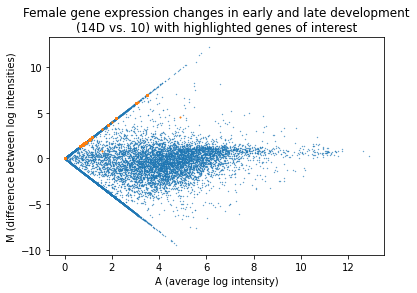

In [16]:
fig, ax = plt.subplots()
ax.scatter(a, m, s=0.1)
ax.scatter(a_hl, m_hl, s=1)
ax.set_title("Female gene expression changes in early and late development\n"
            "(14D vs. 10) with highlighted genes of interest")
ax.set_xlabel("A (average log intensity)")
ax.set_ylabel("M (difference between log intensities)")
plt.show()